In [ ]:
### "International Sale Report.csv"
#Sales Trends Over Time: How do international sales vary month-to-month or year-to-year?
#Product Popularity: Which products (based on Style, SKU) are most popular in international sales?
#Average Sale Amount: What is the average sale amount or rate per product, and how does this vary across different styles or sizes?
#Customer Analysis: Are there any notable trends in terms of repeat customers or customer preferences?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
##Read Data
sales_report = pd.read_csv('/Users/cicizeng/Desktop/STA386/Semester Project/Amazon Sale Report.csv')
inter_sale =  pd.read_csv('/Users/cicizeng/Desktop/STA386/Semester Project/International sale Report.csv')
print(inter_sale.head())


   index      DATE  Months            CUSTOMER    Style             SKU Size  \
0      0  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004    MEN5004-KR-L    L   
1      1  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004   MEN5004-KR-XL   XL   
2      2  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5004  MEN5004-KR-XXL  XXL   
3      3  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5009    MEN5009-KR-L    L   
4      4  06-05-21  Jun-21  REVATHY LOGANATHAN  MEN5011    MEN5011-KR-L    L   

    PCS    RATE GROSS AMT  
0  1.00  616.56    617.00  
1  1.00  616.56    617.00  
2  1.00  616.56    617.00  
3  1.00  616.56    617.00  
4  1.00  616.56    617.00  


/var/folders/_v/0wz_5qjs5hl7y0wpzjzxbzpm0000gq/T/ipykernel_12655/3862758579.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_report = pd.read_csv('/Users/cicizeng/Desktop/STA386/Semester Project/Amazon Sale Report.csv')


In [4]:
###Clean Data
sales_report.drop(columns=['Unnamed: 22'], inplace=True)
sales_report['Date'] = pd.to_datetime(sales_report['Date'], format='%m-%d-%y', errors='coerce')  # Converting 'Date' to datetime
sales_report['ship-postal-code'] = sales_report['ship-postal-code'].astype(str)  # Converting 'ship-postal-code' to string
sales_report = sales_report.dropna(subset=['Amount'])  # Dropping rows with missing 'Amount'


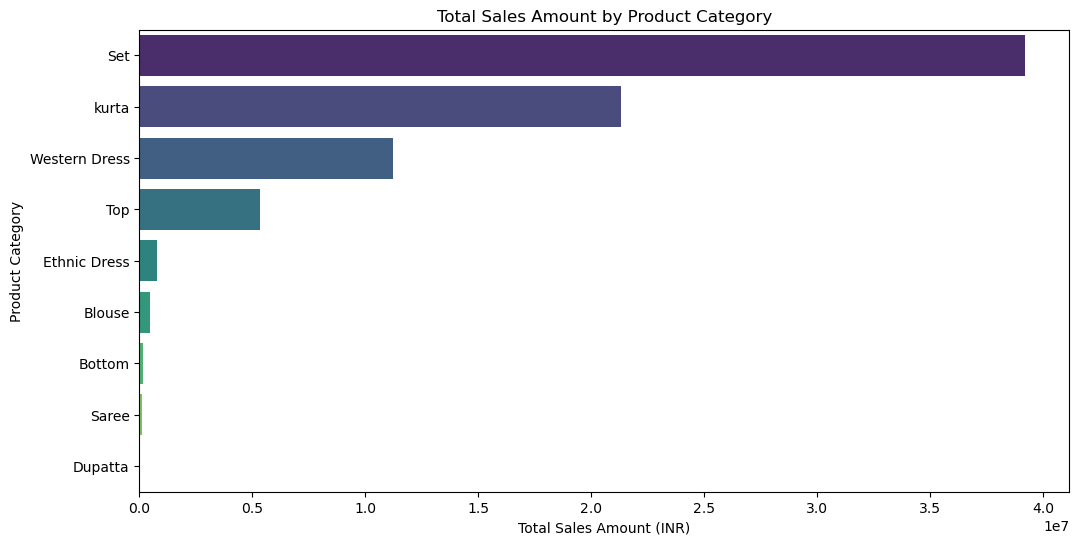

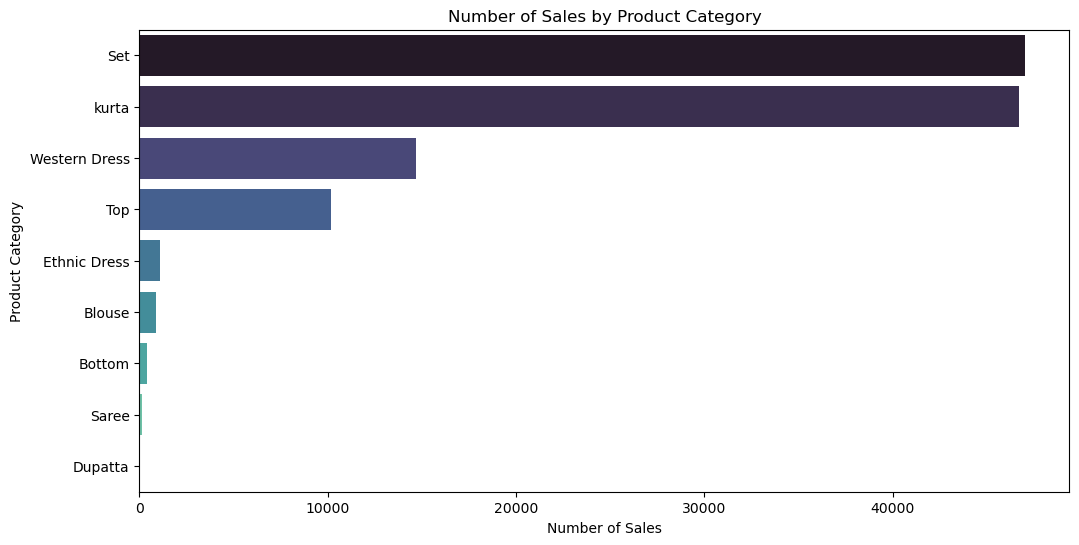

In [5]:
###EDA
# Grouping the data by 'Category'
category_sales = sales_report.groupby('Category').agg(Total_Sales_Amount=('Amount', 'sum'),
                                               Number_of_Sales=('Order ID', 'count')).reset_index()

# Sorting based on total sales amount
category_sales_sorted = category_sales.sort_values(by='Total_Sales_Amount', ascending=False)

# Plotting the total sales amount by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Sales_Amount', y='Category', data=category_sales_sorted, palette="viridis")
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Total Sales Amount (INR)')
plt.ylabel('Product Category')
plt.show()

# Plotting the number of items sold by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_Sales', y='Category', data=category_sales_sorted, palette="mako")
plt.title('Number of Sales by Product Category')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category')
plt.show()

In [14]:
##Clean International Data
# Function to convert a column to numeric if it's not already
def convert_to_numeric(column):
    if column.dtype == 'object':
        # If the column is an object type, remove non-numeric characters and convert to numeric
        column = pd.to_numeric(column.str.replace('[^0-9.]', '', regex=True), errors='coerce')
    # If the column is already numeric, just return it
    return column

# Apply the function to the 'PCS' and 'RATE' columns
inter_sale['PCS'] = convert_to_numeric(inter_sale['PCS'])
inter_sale['RATE'] = convert_to_numeric(inter_sale['RATE'])

# Recheck the data types and missing values
print(inter_sale.dtypes)
print(inter_sale.isnull().sum())



index                 int64
DATE         datetime64[ns]
Months               object
CUSTOMER             object
Style                object
SKU                  object
Size                 object
PCS                 float64
RATE                float64
GROSS AMT           float64
dtype: object
index            0
DATE         18797
Months          25
CUSTOMER      1040
Style         1040
SKU           2474
Size          1040
PCS           1041
RATE          1041
GROSS AMT     1041
dtype: int64


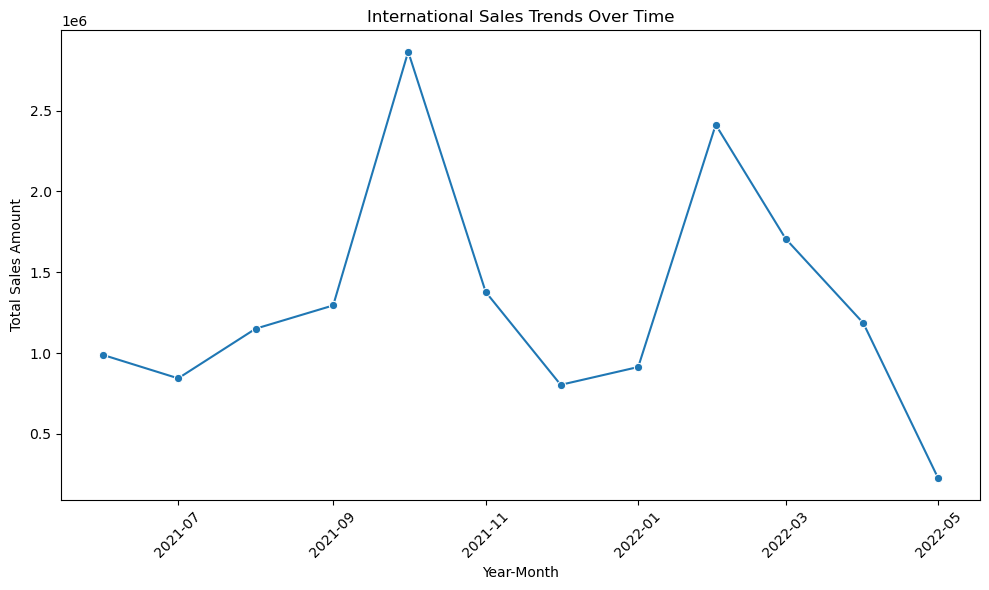

In [16]:
# Ensure 'DATE' is in datetime format
inter_sale['DATE'] = pd.to_datetime(inter_sale['DATE'], errors='coerce')

# Create 'Year-Month' column
inter_sale['Year-Month'] = inter_sale['DATE'].dt.to_period('M')

# Now group by 'Year-Month'
sales_trends = inter_sale.groupby('Year-Month').agg(Total_Sales=('GROSS AMT', 'sum')).reset_index()

# Converting 'Year-Month' back to datetime for plotting
sales_trends['Year-Month'] = sales_trends['Year-Month'].dt.to_timestamp()

# Plot the sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trends, x='Year-Month', y='Total_Sales', marker='o')
plt.title('International Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [17]:
# Grouping the data by 'Style' and 'SKU' and calculating the total sales amount and total units sold
product_popularity = inter_sale.groupby(['Style', 'SKU']).agg(
    Total_Sales_Amount=('GROSS AMT', 'sum'),
    Total_Units_Sold=('PCS', 'sum')
).reset_index()

# Sorting the results to find the most popular products by sales amount
most_profitable_products = product_popularity.sort_values(by='Total_Sales_Amount', ascending=False).head(10)

# Sorting the results to find the most popular products by units sold
most_sold_products = product_popularity.sort_values(by='Total_Units_Sold', ascending=False).head(10)

# Display the top 10 products by sales amount
print("Most Profitable Products:")
print(most_profitable_products)

# Display the top 10 products by units sold
print("Most Sold Products:")
print(most_sold_products)


Most Profitable Products:
       Style              SKU  Total_Sales_Amount  Total_Units_Sold
4130  SET268   SET268-KR-NP-L             54772.0          28494.35
1202   J0277      J0277-SKD-S             43676.0          19098.35
1201   J0277      J0277-SKD-M             38585.0          24328.35
4131  SET268   SET268-KR-NP-M             37566.0          23090.85
4133  SET268  SET268-KR-NP-XL             34102.0          21154.85
4132  SET268   SET268-KR-NP-S             30758.0          15457.35
4066  SET252   SET252-KR-PP-L             26320.0          13743.50
3681  SET110   SET110-KR-PP-S             25849.0          17373.60
3680  SET110   SET110-KR-PP-M             25788.0          14497.55
4068  SET252  SET252-KR-PP-S.             24911.0          19788.75
Most Sold Products:
         Style              SKU  Total_Sales_Amount  Total_Units_Sold
4617  SHIPPING         SHIPPING                 0.0        2804918.00
4130    SET268   SET268-KR-NP-L             54772.0          28494